## Load Independencies

In [1]:
# import main (major) libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation metric
from sklearn.metrics import mean_squared_error

# Features engineering
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# sklearn
# Linear Regression algorithm
from sklearn.linear_model import Lasso

# Model selection and hyperParameter tuning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

# sklearn pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

# impute null values
from sklearn.impute import SimpleImputer

# import SVM algorithm
from sklearn.svm import SVR

# import Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor

# import tecniques to make transformer
from sklearn.base import BaseEstimator, TransformerMixin

# other libraries
import os, joblib

# XGBRegressor API
from xgboost import XGBRegressor

## Read Files

In [2]:
# Detect paths
curr_dir = os.getcwd()
file_features_name = "cal_housing_names.csv" # file of feature names
path1 = os.path.join(curr_dir, file_features_name)

file_features_data = "cal_housing_data.csv" # file of features data
path2 = os.path.join(curr_dir, file_features_data)

# load the dataset
feature_names = pd.read_csv(path1)
feature_names = feature_names.iloc[:, 0]

calHousing_df = pd.read_csv(path2, names=feature_names) # read data with names as their features names

# show sample from the dataframe
calHousing_df.head(10)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


## Show information about the dataset

In [3]:
# check info
calHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Comment: ' It seems that no there null values, and all faetures have float data type '

## Show description

In [4]:
calHousing_df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# check duplication
calHousing_df.duplicated().sum()

0

#### Insight: ' there is clearly difference between variation and the median so we perdict the existence of the outliers '

## Eploratory Data Analysis

### Univariate Visualization

In [6]:
# show sample of the dataset
calHousing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


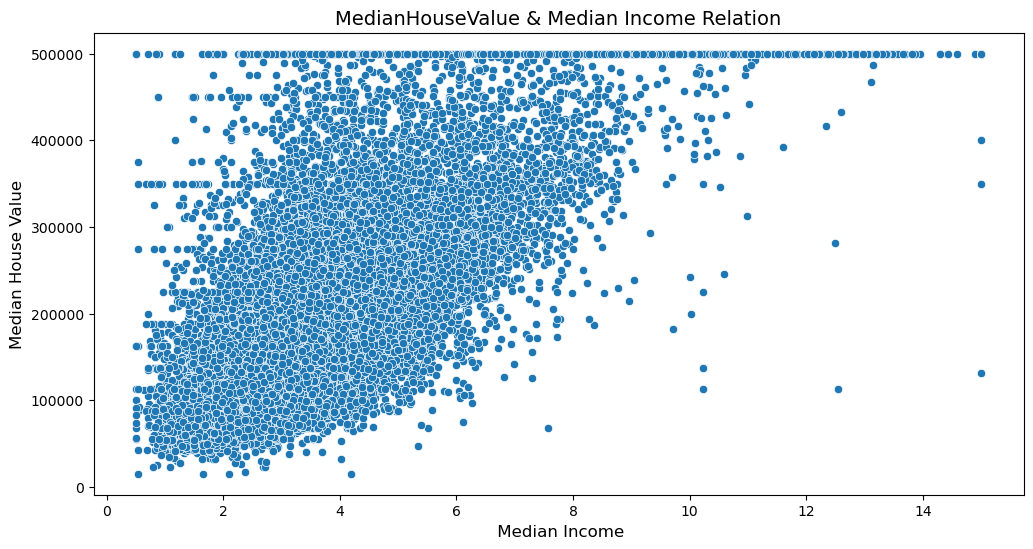

In [7]:
# scatter plot visualization to clear vision
plt.figure(figsize=(12,6))
sns.scatterplot(x='medianIncome', data=calHousing_df, y='medianHouseValue')
plt.title("MedianHouseValue & Median Income Relation", fontsize=14)
plt.xlabel(' Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.show()

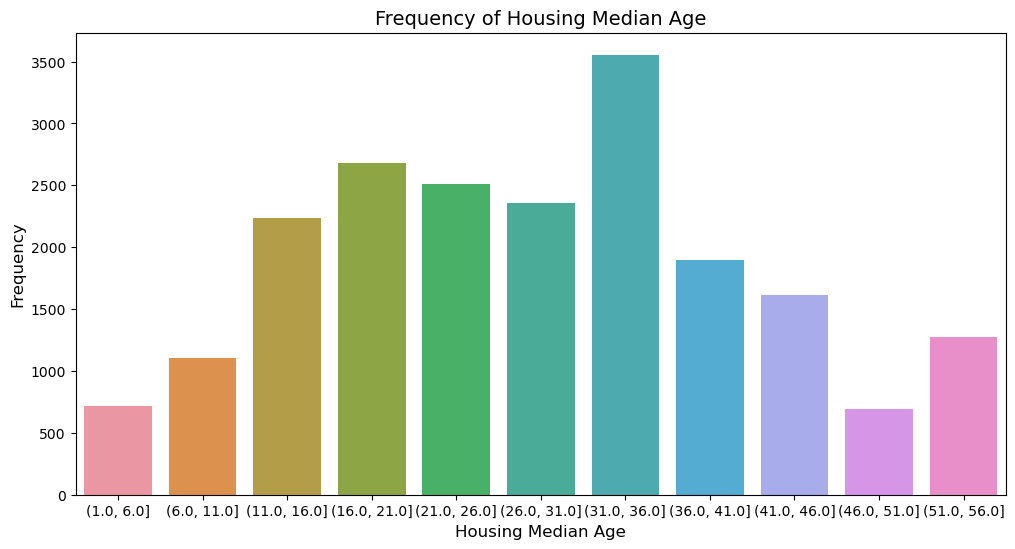

In [8]:
# Getting the max and min of unique values of the housingMedianAge
maxVal = calHousing_df['housingMedianAge'].unique().max()  # Max value in the feature
minVal = calHousing_df['housingMedianAge'].unique().min()  # Min value in the feature

# Make the numerical feature as Categorical to visualize
bin_size = (maxVal - minVal) // 10  # Define bin size based on data range
HousingMedAge = pd.cut(calHousing_df['housingMedianAge'], 
                       bins=np.arange(minVal, maxVal + bin_size, bin_size))

# Count Plot for Housing Median Age bins
plt.figure(figsize=(12,6))
sns.countplot(x=HousingMedAge, data=calHousing_df)
plt.title("Frequency of Housing Median Age", fontsize=14)
plt.xlabel('Housing Median Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

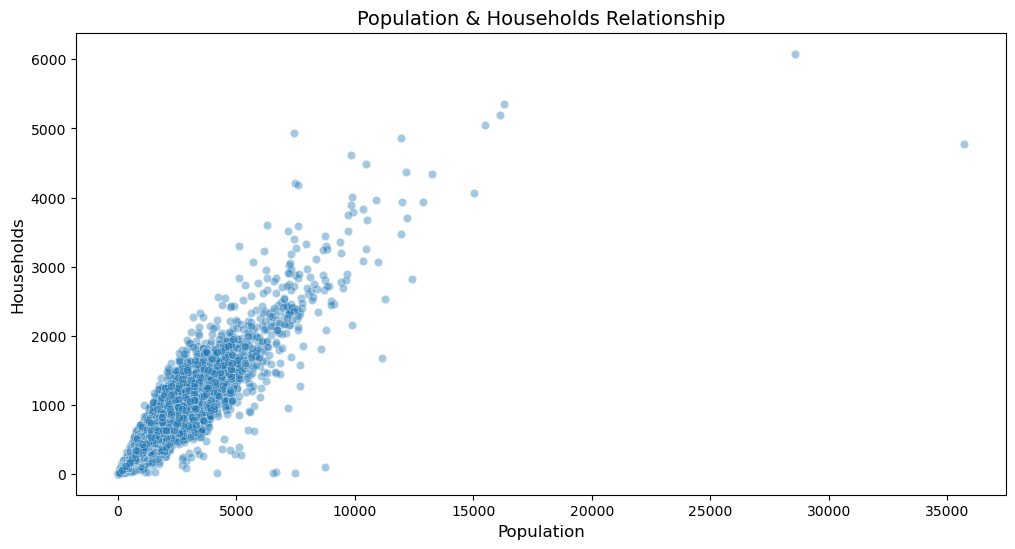

In [9]:
# scatter plot visualization to clear vision for Population & Households Relationship
plt.figure(figsize=(12,6))
sns.scatterplot(x='population', data=calHousing_df, y='households', alpha=0.4)
plt.title("Population & Households Relationship", fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Households', fontsize=12)
plt.show()

#### Insight: ' It seems that there is a positive relationship between population and households, in addition to outliers like we thought '

### Bivariate Visualization

In [10]:
# show a few rows of the dataframe
calHousing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


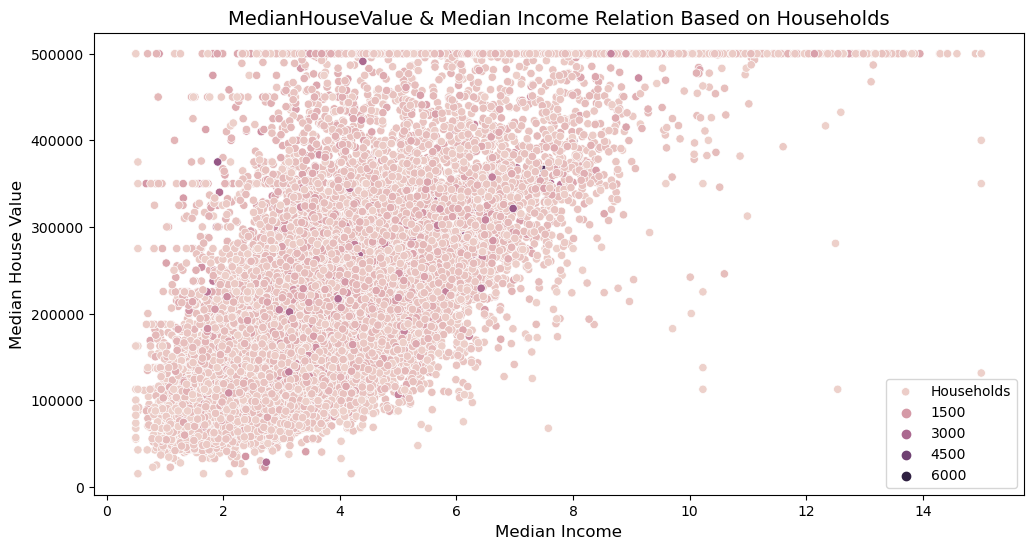

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='medianIncome', data=calHousing_df, y='medianHouseValue', hue='households', label='Households')
plt.title("MedianHouseValue & Median Income Relation Based on Households", fontsize=14)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.legend()
plt.show()

### Multivariate Visualization

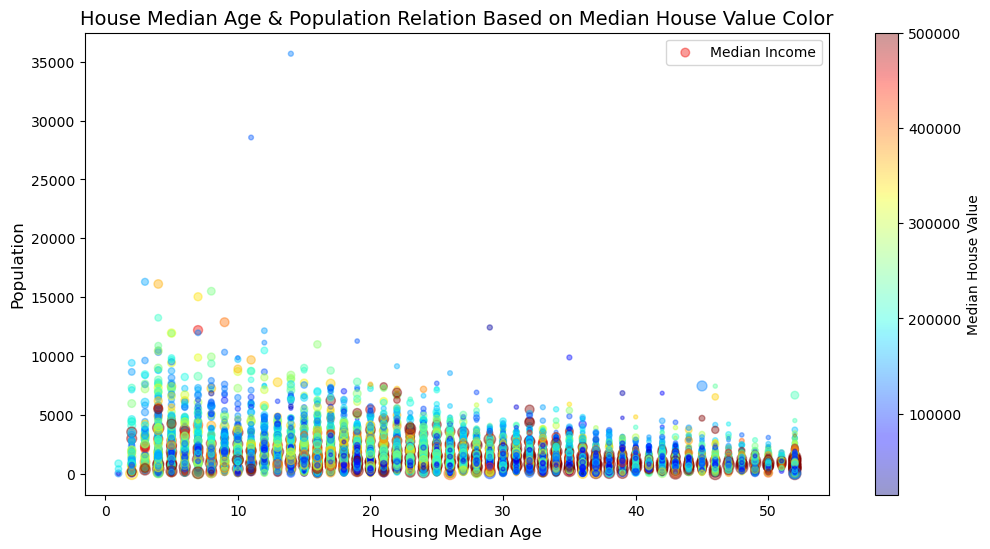

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x=calHousing_df['housingMedianAge'], y=calHousing_df['population'], 
            c=calHousing_df['medianHouseValue'], s=calHousing_df['medianIncome']*5, 
            cmap=plt.get_cmap('jet'), label='Median Income', alpha=0.4) # The size of points is reording on the Median Income

# show cbar and deploy label for it
cbar = plt.colorbar()
cbar.set_label('Median House Value')

# set title and axises labels
plt.title("House Median Age & Population Relation Based on Median House Value Color", fontsize=14)
plt.xlabel('Housing Median Age', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.show()

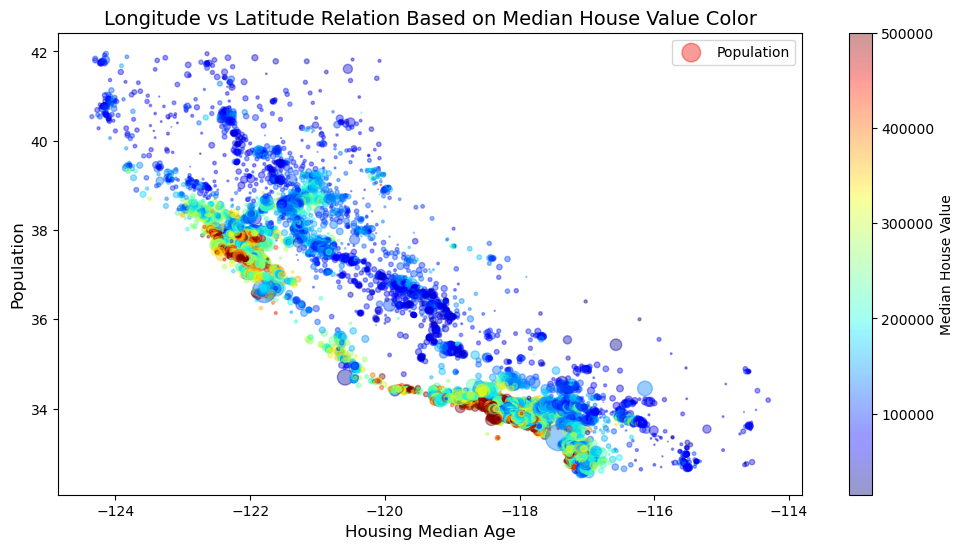

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x=calHousing_df['longitude'], y=calHousing_df['latitude'], 
            c=calHousing_df['medianHouseValue'], s=calHousing_df['population']/100, 
            cmap=plt.get_cmap('jet'), label='Population', alpha=0.4) # The size of points is reording on the population

# show cbar and deploy label for it
cbar = plt.colorbar()
cbar.set_label('Median House Value')

# set title and axises labels
plt.title("Longitude vs Latitude Relation Based on Median House Value Color", fontsize=14)
plt.xlabel('Housing Median Age', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.show()

#### Insight: ' It seems that the population is high on coastal areas in addition to median house value, this means that most of the high house value and population are nearly next to occean '

<Figure size 1400x700 with 0 Axes>

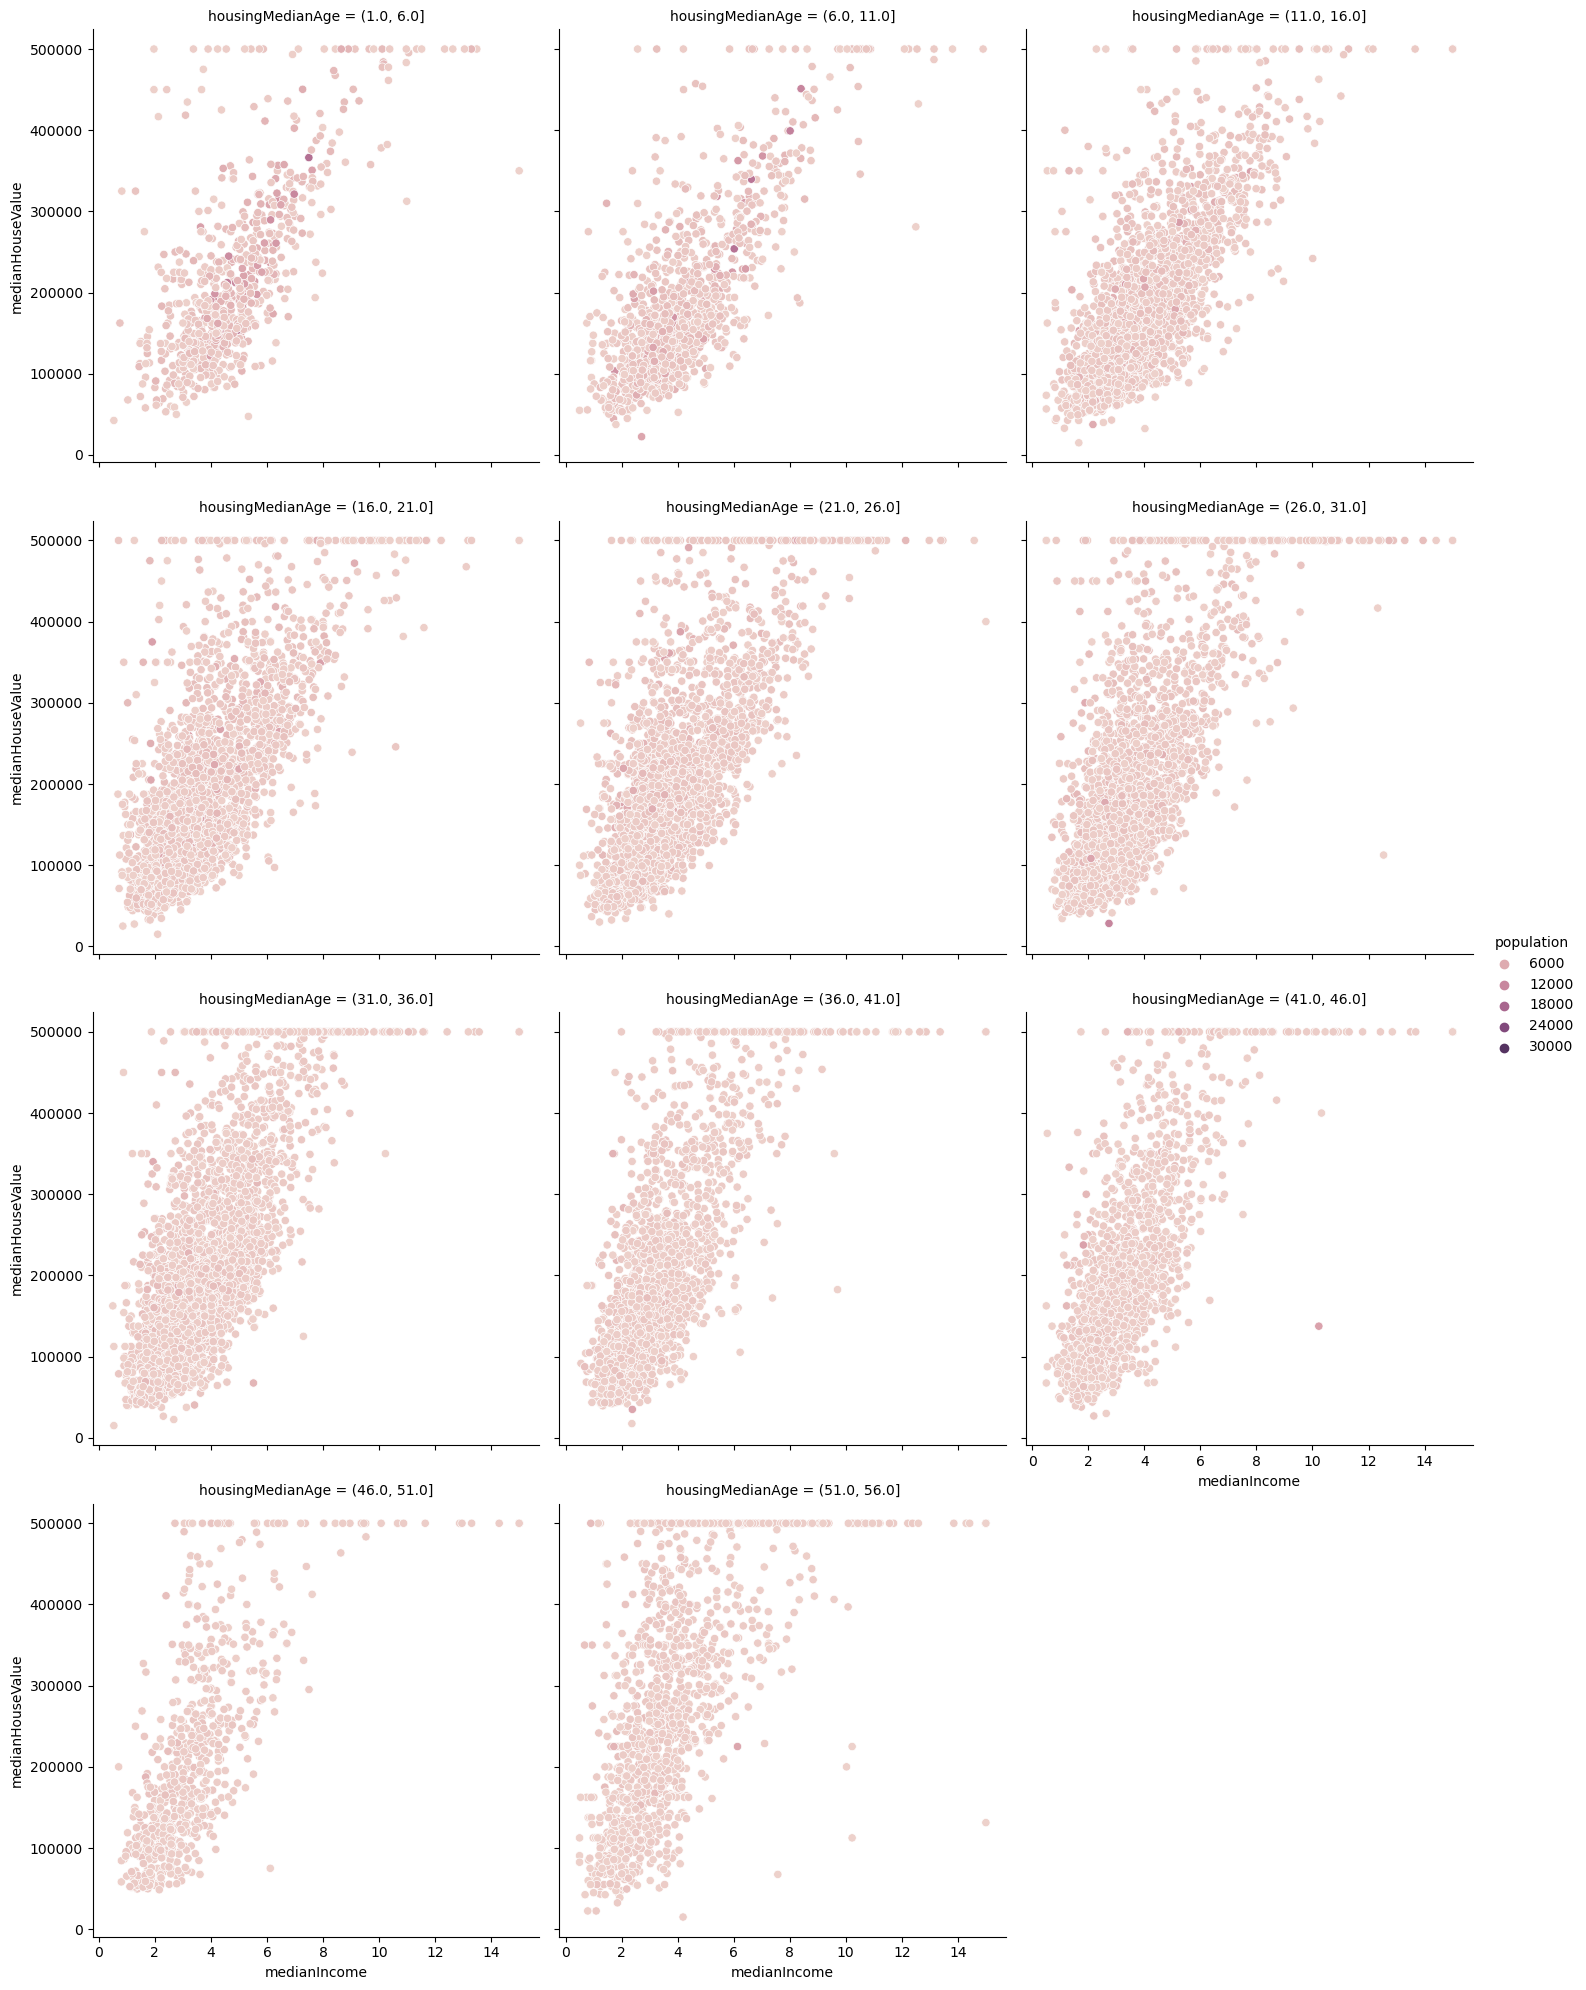

In [14]:
# show scatter plot for all relationships between median income & median house value for each value of housingMedianAge
plt.figure(figsize=(14,7))
sns.relplot(x='medianIncome', y='medianHouseValue', data=calHousing_df, col=HousingMedAge, 
            hue='population', col_wrap=3)

# show plot
plt.show()

#### Insight: ' The population is most high in the modern houses comparing to old/ancient houses '

<Figure size 1400x700 with 0 Axes>

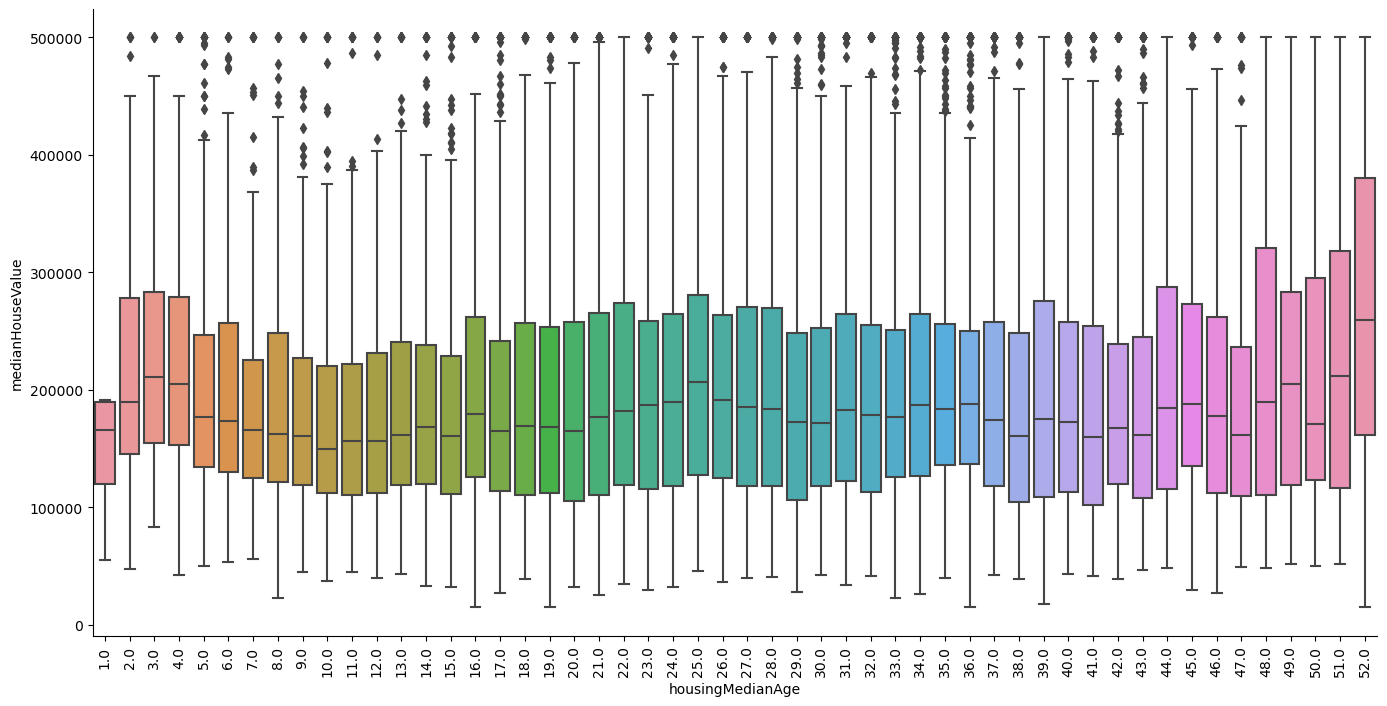

In [15]:
# Set figure size before plotting
plt.figure(figsize=(14, 7))

# Create the box plot
sns.catplot(x='housingMedianAge', y='medianHouseValue', data=calHousing_df, kind='box', height=7, aspect=2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Feature Engineering

In [16]:
# show a few rows of the dataframe
calHousing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [17]:
# Extract new features from existence features
calHousing_df['roomsPerHousehold'] = calHousing_df['totalRooms'] // calHousing_df['households']
calHousing_df['bedRoomsPerroom'] = calHousing_df['totalBedrooms'] // calHousing_df['totalRooms']
calHousing_df['PopulationPerHousehold'] = calHousing_df['population'] // calHousing_df['households']

In [18]:
# Function to classify households
def households_class(row, medianHousingAge, medIncome):
    if ((row['housingMedianAge'] <= medianHousingAge) & (row['medianIncome'] >= medIncome * 2)) | (row['medianIncome'] >= medIncome * 2):
        return 'A'
    elif ((row['housingMedianAge'] <= medianHousingAge * 2) & (row['medianIncome'] >= medIncome)) | (row['medianIncome'] >= medIncome):
        return 'B'
    else:
        return 'C'

# Compute global intervals
medianHousingAge = np.max(calHousing_df['housingMedianAge']) // 3
medIncome = np.max(calHousing_df['medianIncome']) / 3

# Apply classification function to the DataFrame
calHousing_df['householdClass'] = calHousing_df.apply(
    households_class, axis=1, 
    medianHousingAge=medianHousingAge, 
    medIncome=medIncome
)

# Display the first few rows after modification
calHousing_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,roomsPerHousehold,bedRoomsPerroom,PopulationPerHousehold,householdClass
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.0,0.0,2.0,B
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.0,0.0,2.0,B
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.0,0.0,2.0,B
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.0,0.0,2.0,B
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.0,0.0,2.0,C


In [19]:
# count of every unique value
calHousing_df['householdClass'].value_counts()

C    16151
B     4181
A      308
Name: householdClass, dtype: int64

<Axes: >

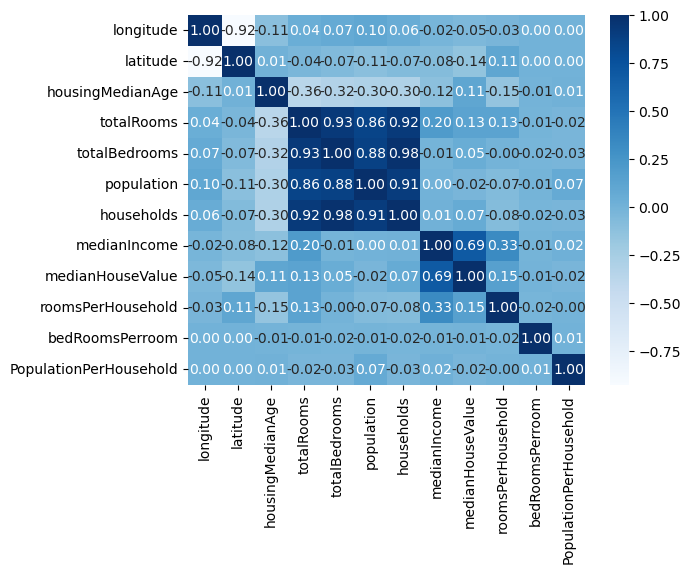

In [20]:
# Check linear correlation with heatmap
correlation = calHousing_df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues')

## Data Preprocessing

In [21]:
# features and target detection and seperation
X = calHousing_df.drop('medianHouseValue', axis=1)
y = calHousing_df['medianHouseValue']

In [22]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

# print shape of all splits
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (16512, 12)
The shape of X_test is: (4128, 12)
The shape of y_train is: (16512,)
The shape of y_test is: (4128,)


In [23]:
# split numerical features lonely 
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int32', 'int64', 'float32', 'float64']]

# split categorical features lonely
cat_cols = [col for col in X_train.columns if X_train[col].dtype not in ['int32', 'int64', 'float32', 'float64']]

## Pipeline for Preprocessing operations

In [24]:
# make clssification transformer (optional)
class HouseholdClassTransformer(BaseEstimator, TransformerMixin):
    def _init(self):
        pass

    def fit(self, X, y=None):
        # if X is Dataframe
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()  # transform into numpy

        # save indecies
        self.housingMedianAge_idx = 0
        self.medianIncome_idx = 1

        # slicing values calculation
        self.medianHousingAge = X[:, self.housingMedianAge_idx].max() // 3
        self.medIncome = X[:, self.medianIncome_idx].max() / 3
        return self

    def transform(self, X):
        # if Dataframe or not
        is_dataframe = isinstance(X, pd.DataFrame)
        if is_dataframe:
            X_copy = X.copy()  # copy data to avoid data modification
        else:
            X_copy = pd.DataFrame(X, columns=['housingMedianAge', 'medianIncome'])

        # Apply classification based on training data
        def classify(house):
            if ((house['housingMedianAge'] <= self.medianHousingAge) & (house['medianIncome'] >= self.medIncome * 2)) | (house['medianIncome'] >= self.medIncome * 2):
                return 'A'
            elif ((house['housingMedianAge'] <= self.medianHousingAge * 2) & (house['medianIncome'] >= self.medIncome)) | (house['medianIncome'] >= self.medIncome):
                return 'B'
            else:
                return 'C'

        # check if householdClass column is exist or not
        if 'householdClass' in X_copy.columns:
            X_copy['householdClass'] = X_copy.apply(classify, axis=1)  # update values only
        else:
            X_copy['householdClass'] = X_copy.apply(classify, axis=1)  # adding column

        # return dataframe or numpy
        return X_copy.values if not is_dataframe else X_copy

In [25]:
# Pipelines
# numerical pipeline
num_pipeline = Pipeline(steps=[
                                ('selector', DataFrameSelector(num_cols)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
                            ])

# categorical pipeline
cat_pipeline = Pipeline(steps=[
#                                 ('selector1', DataFrameSelector(['housingMedianAge', 'medianIncome', 'householdClass'])),
#                                 ('householdClassifier', HouseholdClassTransformer()), ## active it if you want to classify new instances
                                ('selector2', DataFrameSelector(cat_cols)),
                                ('encoder', OrdinalEncoder())
                            ])

# combine pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num', num_pipeline),
                                ('cat', cat_pipeline)
                            ])

# Fit and transform
X_train_transformed = total_pipeline.fit_transform(X_train)
X_test_transformed = total_pipeline.transform(X_test)

In [26]:
# show shapes of X_train and X_test
X_train_transformed.shape, X_test_transformed.shape

((16512, 12), (4128, 12))

## Building Models

### 1. Lasso

In [27]:
# Using Lasso to other purpose, that is feature importance
lass_reg = Lasso(alpha=0.1, random_state=422) ## Take an object from the algorithm class

# Train the model on data
lass_reg.fit(X_train_transformed, y_train)

Lasso(alpha=0.1, random_state=422)

In [28]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using Lasso
lass_scores_cv = cross_val_score(estimator=lass_reg, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
y_lass_pred = lass_scores_cv * -1
# square root calculation to optain RMSE
y_lass_pred = np.sqrt(y_lass_pred)
# print mean RMSE calculated
print(f'Mean of RMSE for Lasso scores: {np.round(np.mean(y_lass_pred), 4)}')

# calculate predictions of cross validation folds using Lasso
lass_pred_cv = cross_val_predict(estimator=lass_reg, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

print(f'-' * 80)

# RMSE by square root of MSE evaluation metric calculation
rmse_lass = np.sqrt(mean_squared_error(y_train, lass_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE for Lasso algorithm: {rmse_lass:.4f}')

Mean of RMSE for Lasso scores: 69304.8606
--------------------------------------------------------------------------------
RMSE for Lasso algorithm: 69321.5275


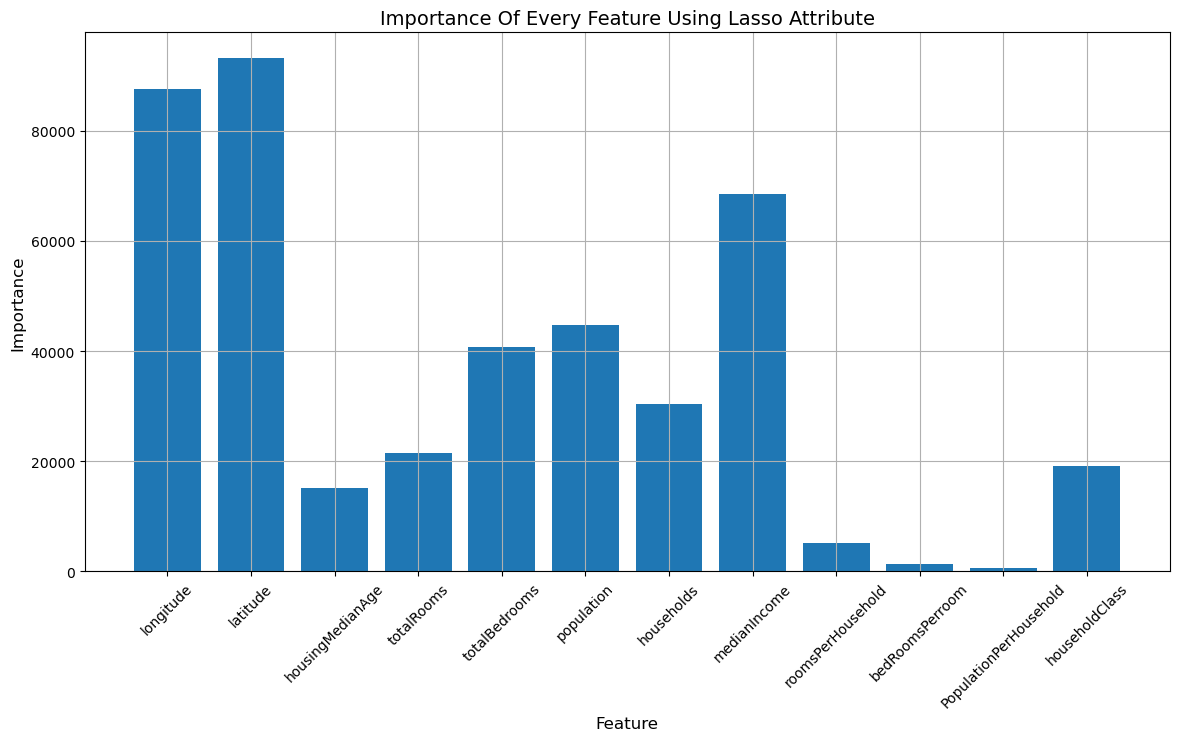

In [29]:
# Display coefficients usin Lasso to check feature importance
## Preparing list for assign features importances with absolute values to delete negative sign
lasso_imp = np.abs(lass_reg.coef_) 

names = [col for col in X_train.columns] ## assign name of every feature in a special list

# show importance in bar plot
plt.figure(figsize=(14,7))
plt.bar(names, lasso_imp)
plt.title('Importance Of Every Feature Using Lasso Attribute', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.grid('on')
plt.show()

### 2. Support Vector Machine (SVM)

In [30]:
sv_reg = SVR(kernel='linear', epsilon=0.1, C=1) ## Take an object from the algorithm class

In [31]:
sv_reg.fit(X_train_transformed, y_train) ## train the model on the data

SVR(C=1, kernel='linear')

In [32]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using SVR
svr_scores_cv = cross_val_score(estimator=sv_reg, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
# square root calculation to optain RMSE
y_svr_pred = np.sqrt(svr_scores_cv * -1)

# print mean RMSE calculated
print(f'Mean of RMSE for SVR algorithm: {np.round(np.mean(y_svr_pred), 4)}')

# calculate predictions of cross validation folds using SVR
svr_pred_cv = cross_val_predict(estimator=sv_reg, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

print(f'-' * 80)

# RMSE by square root of MSE evaluation metric calculation
rmse_svr = np.sqrt(mean_squared_error(y_train, svr_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE for SVR algorithm: {rmse_svr:.4f}')

Mean of RMSE for SVR algorithm: 112769.9664
--------------------------------------------------------------------------------
RMSE for SVR algorithm: 112781.0724


### 3. Random Forest

In [33]:
# Take object of the algorithm class
forest_reg = RandomForestRegressor(n_estimators=110, max_depth=6, random_state=422, n_jobs=-1,
                                  verbose=2, max_samples=0.8)

In [34]:
forest_reg.fit(X_train_transformed, y_train) ## train the algorithm

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 110building tree 2 of 110
building tree 3 of 110

building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110building tree 24 of 110

building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s


building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75

[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    2.2s finished


RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=110, n_jobs=-1,
                      random_state=422, verbose=2)

#### Evaluation Metric Before Tuning For Random Forest

In [35]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using Random Forest
forest_scores_cv = cross_val_score(estimator=forest_reg, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
# square root calculation to optain RMSE
y_forest_pred = np.sqrt(forest_scores_cv * -1)

# print mean RMSE calculated
print(f'Mean of RMSE for scores using Random Forest algorithm: {np.round(np.mean(y_forest_pred), 4)}')

# calculate predictions of cross validation folds using Random Forest
forest_pred_cv = cross_val_predict(estimator=forest_reg, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

print(f'-' * 80)

# RMSE by square root of MSE evaluation metric calculation
rmse_forest = np.sqrt(mean_squared_error(y_train, forest_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE using Random Forest algorithm: {rmse_forest:.4f}')

Mean of RMSE for scores using Random Forest algorithm: 64301.7334
--------------------------------------------------------------------------------
RMSE using Random Forest algorithm: 64305.6802


In [36]:
# prepare parameters ranges for tuning
forest_param = {
    'n_estimators':np.arange(90,150,10),
    'max_depth':np.arange(3,10),
    'min_samples_split':np.arange(2,8),
    'min_samples_leaf':np.arange(1,6),
    'max_samples':np.arange(0.7,1,0.1)
}

In [37]:
# use RandomizedSearchCV to apply hyperParameters tuning
forest_grid = RandomizedSearchCV(estimator=forest_reg, param_distributions=forest_param, n_jobs=-1, cv=5,
                          scoring='neg_mean_squared_error', n_iter=30, random_state=422)

forest_grid.fit(X_train_transformed, y_train) # fit on data using the the hyperParameter tuning algorithm

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 120building tree 2 of 120
building tree 3 of 120

building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s


building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.8s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=110, n_jobs=-1,
                                                   random_state=422,
                                                   verbose=2),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_samples': array([0.7, 0.8, 0.9, 1. ]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                                        'n_estimators': array([ 90, 100, 110, 120, 130, 140])},
                   random_state=422, scoring='neg_mean_squared_error')

In [38]:
# Display best parameters from RandomizedSearchCV tecnique
forest_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_samples': 0.7,
 'max_depth': 9}

In [39]:
# Assign best Estimator after tuning
best_forest = forest_grid.best_estimator_

In [40]:
best_forest.fit(X_train_transformed, y_train) ## train the algoritm with best parameters on data

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 120building tree 2 of 120
building tree 3 of 120

building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s


building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82 of 120
building tree 83

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.3s finished


RandomForestRegressor(max_depth=9, max_samples=0.7, min_samples_leaf=2,
                      min_samples_split=6, n_estimators=120, n_jobs=-1,
                      random_state=422, verbose=2)

#### Evaluation Metric After Tuning For Random Forest

In [41]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using the best Random Forest
forest_tuned_scores = cross_val_score(estimator=best_forest, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
# square root calculation to optain RMSE
forest_tuned_pred = np.sqrt(forest_tuned_scores * -1)

# print mean RMSE calculated
print(f'Mean of RMSE for scores using Random Forest algorithm after Tuning: {np.round(np.mean(forest_tuned_pred), 4)}')

print(f'-' * 80)

# calculate predictions of cross validation folds using Random Forest
forest_tuned_pred_cv = cross_val_predict(estimator=best_forest, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

# RMSE by square root of MSE evaluation metric calculation
rmse_forest_tuned = np.sqrt(mean_squared_error(y_train, forest_tuned_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE after Tuning using Random Forest algorithm: {rmse_forest_tuned:.4f}')

Mean of RMSE for scores using Random Forest algorithm after Tuning: 56391.2652
--------------------------------------------------------------------------------
RMSE after Tuning using Random Forest algorithm: 56394.1649


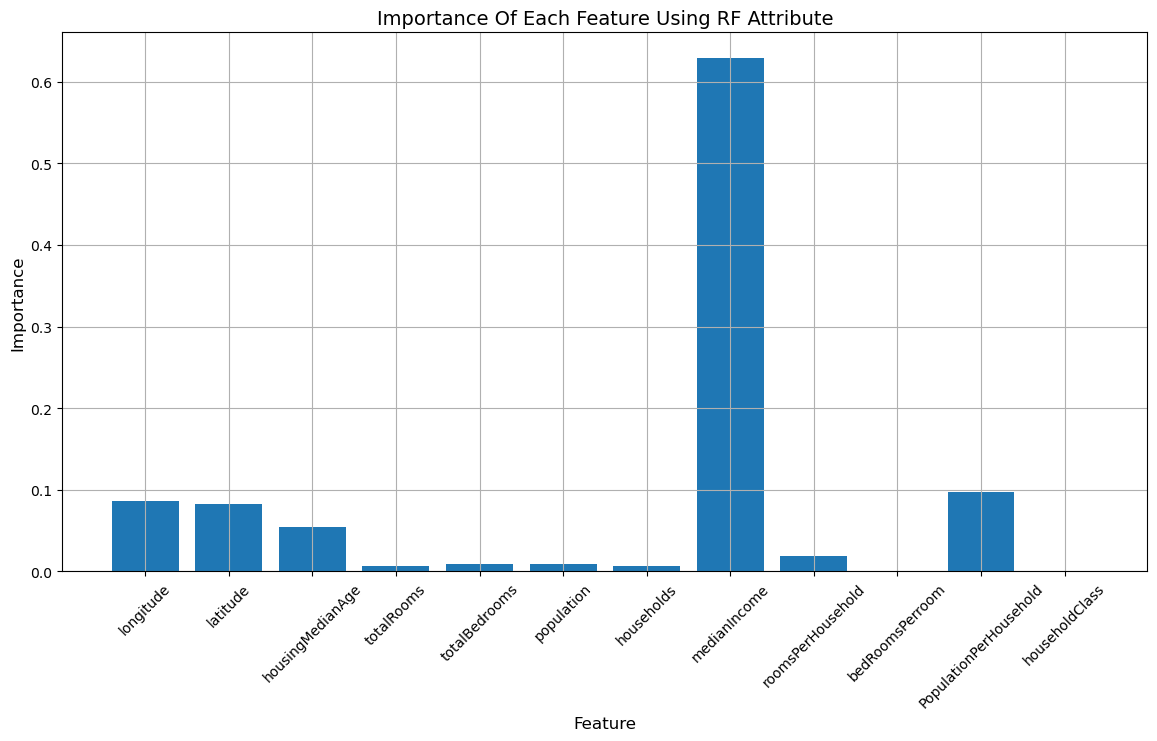

In [42]:
# show feature importance from Random forest attribute
feat_imp_forest = best_forest.feature_importances_

# show importance in bar plot
plt.figure(figsize=(14,7))
plt.bar(names, feat_imp_forest)
plt.title('Importance Of Each Feature Using RF Attribute', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.grid('on')
plt.show()

### 4. XGBOOST

In [43]:
# Take object of the algorithm class
xgb_reg = XGBRegressor(n_estimators=150, max_depth=10, n_jobs=-1, random_state=422, learning_rate=0.1, subsample=0.9)

In [44]:
xgb_reg.fit(X_train_transformed, y_train) ## train the algorithm on data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=-1,
             num_parallel_tree=None, random_state=422, ...)

#### Evaluation Metric Before Tuning For XGBR

In [45]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using XGBR
xgbr_scores_cv = cross_val_score(estimator=xgb_reg, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
# square root calculation to optain RMSE
y_xgb_pred = np.sqrt(xgbr_scores_cv * -1)

# print mean RMSE calculated
print(f'Mean of RMSE for scores using XGBRegressor algorithm: {np.round(np.mean(y_xgb_pred), 4)}')

# calculate predictions of cross validation folds using XGBR
xgbr_pred_cv = cross_val_predict(estimator=xgb_reg, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

print(f'-' * 80)

# RMSE by square root of MSE evaluation metric calculation
rmse_xgbr = np.sqrt(mean_squared_error(y_train, xgbr_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE using XGBRegressor algorithm: {rmse_xgbr:.4f}')

Mean of RMSE for scores using XGBRegressor algorithm: 47505.0956
--------------------------------------------------------------------------------
RMSE using XGBRegressor algorithm: 47506.9025


In [46]:
# prepare parameters ranges for tuning
xgb_param = {
    'n_estimators':np.arange(240,300,10),
    'max_depth':np.arange(4,10),
    'learning_rate':np.arange(0.1,1,0.1),
    'subsample':np.arange(0.7, 1, 0.1)
}

In [47]:
# use RandomizedSearchCV to apply hyperParameters tuning
xgbr_grid = RandomizedSearchCV(estimator=xgb_reg, param_distributions=xgb_param, n_jobs=-1, cv=5,
                          scoring='neg_mean_squared_error', n_iter=30, verbose=6, random_state=422)

In [48]:
# fit on data using the the hyperParameter tuning algorithm
xgbr_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None, n_estimators=150,
                                          n_jobs=-1, num_parallel_tree=None,
                                          random_state=422, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([240, 250, 260, 270, 280, 290]),
                                        'subsample': array([0.7, 0.8, 0.9, 1. ])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [49]:
# Display best parameters from RandomizedSearchCV tecnique
xgbr_grid.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 280,
 'max_depth': 8,
 'learning_rate': 0.1}

In [50]:
best_xgbr = xgbr_grid.best_estimator_ # Assign best Estimator after tuning
best_xgbr.fit(X_train_transformed, y_train)  ## train the algoritm with best parameters on data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=280, n_jobs=-1,
             num_parallel_tree=None, random_state=422, ...)

#### Evaluation Metric After Tuning For XGBR

In [51]:
# Use cross validation to avoid overfitting and accurate results after tuning
# calculate scores of cross validation folds using best XGBR
xgbr_tuned_scores_cv = cross_val_score(estimator=best_xgbr, X=X_train_transformed, y=y_train, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)

# multiply the result by -1 to positive values
# square root calculation to optain RMSE
xgb_tuned_pred = np.sqrt(xgbr_tuned_scores_cv * -1)

# print mean RMSE calculated
print(f'Mean of RMSE after Tuning for scores using XGBRegressor algorithm: {np.round(np.mean(xgb_tuned_pred), 4)}')

# calculate predictions of cross validation folds using best XGBR
xgbr_tuned_pred_cv = cross_val_predict(estimator=best_xgbr, X=X_train_transformed, y=y_train, cv=5,
                                method='predict', n_jobs=-1)

print(f'-' * 80)

# RMSE by square root of MSE evaluation metric calculation
rmse_xgbr_tuned = np.sqrt(mean_squared_error(y_train, xgbr_tuned_pred_cv))

# print RMSE calculated using predictions of cross validation
print(f'RMSE after Tuning using XGBRegressor algorithm: {rmse_xgbr_tuned:.4f}')

Mean of RMSE after Tuning for scores using XGBRegressor algorithm: 46654.5366
--------------------------------------------------------------------------------
RMSE after Tuning using XGBRegressor algorithm: 46656.7751


## Models Comparison

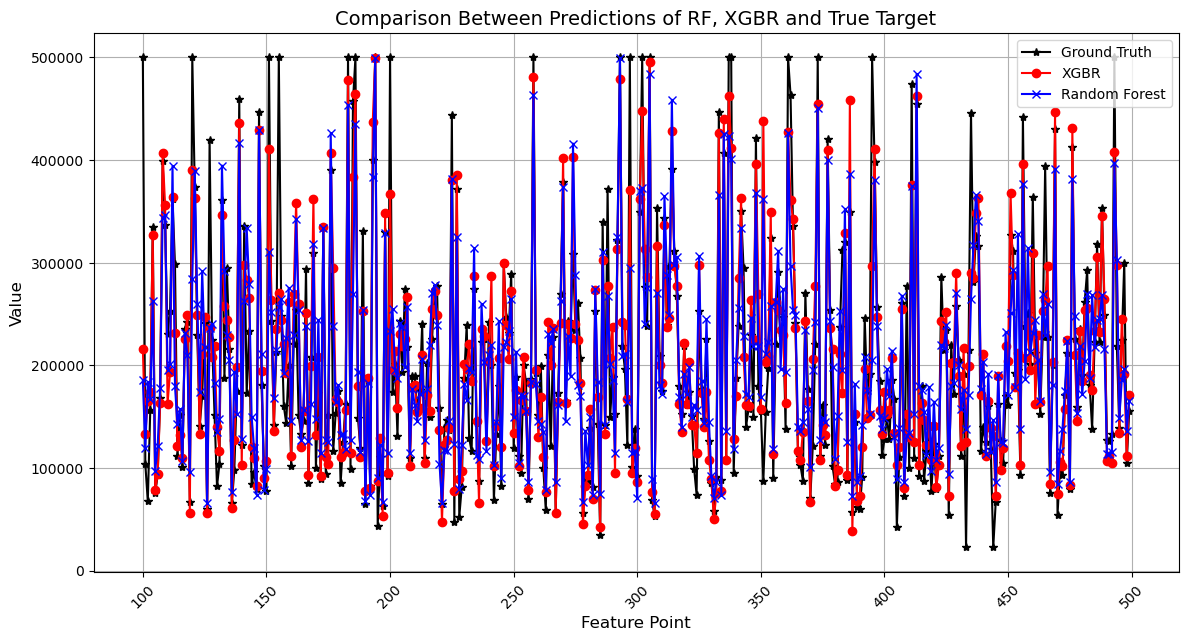

In [54]:
sample_test = np.arange(100,500) ## sample of points

# shoe plots of each point in true data and predicted using XGBR and RF
plt.figure(figsize=(14,7))
plt.plot(sample_test, y_train.values[100:500], color='k', marker='*', label='Ground Truth')
plt.plot(sample_test, xgbr_tuned_pred_cv[100:500], color='red', marker='o', label='XGBR')
plt.plot(sample_test, forest_tuned_pred_cv[100:500], color='blue', marker='x', label='Random Forest')
plt.title('Comparison Between Predictions of RF, XGBR and True Target', fontsize=14)
plt.xlabel('Feature Point', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.grid('on')
plt.legend() ## Display labels of plots
plt.savefig('models_comparison.png')
plt.show()

## Inference On Test Data

In [55]:
pred_test = best_xgbr.predict(X_test_transformed) ## y predicted using best XGBR

rmse_xgbr_test = np.sqrt(mean_squared_error(y_test, pred_test)) ## Take square root to optain RMSE

print(f'RMSE of best XGBR on test data is: {rmse_xgbr_test}') ## Print the result of RMSE

RMSE of best XGBR on test data is: 45335.01603297655


## Download The Model On The Machine

In [56]:
joblib.dump(best_xgbr, 'xgbr_model.pkl')

['xgbr_model.pkl']